<a href="https://colab.research.google.com/github/afzal026/Data-manipulation-Handling-Missing-Data-Data-Visualization-clustering/blob/main/PDS11_11_project2_ShahAfzal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv("https://raw.githubusercontent.com/afzal026/Dataset-Merging-Data-Manipulation-K-Means-Clustering/refs/heads/main/term-test-1-result.csv")
df1.head()

,regNo,name,TT1_mark
0,101,Student 1,16
1,102,Student 2,3
2,103,Student 3,15
3,104,Student 4,9
4,105,Student 5,15


In [3]:
df2 = pd.read_csv("https://raw.githubusercontent.com/afzal026/Dataset-Merging-Data-Manipulation-K-Means-Clustering/refs/heads/main/term-test-2-result.csv")
df2.head()

,regNo,name,TT2_mark
0,101,Student 1,0
1,102,Student 2,4
2,103,Student 3,12
3,104,Student 4,18
4,105,Student 5,13


In [4]:
df1.rename(columns=str.strip, inplace=True)
df2.rename(columns=str.strip, inplace=True)
print(df1.columns)
print(df2.columns)

Index(['regNo', 'name', 'TT1_mark'], dtype='object')
Index(['regNo', 'name', 'TT2_mark'], dtype='object')


In [5]:
merged_df = pd.merge(df1,df2, on = ["regNo", "name"])
merged_df.head()

,regNo,name,TT1_mark,TT2_mark
0,101,Student 1,16,0
1,102,Student 2,3,4
2,103,Student 3,15,12
3,104,Student 4,9,18
4,105,Student 5,15,13


In [6]:
merged_df['Best TT Marks'] = merged_df[['TT1_mark', 'TT2_mark']].max(axis=1)
merged_df['Average TT Marks'] = merged_df[['TT1_mark', 'TT2_mark']].mean(axis=1)
merged_df.head()

,regNo,name,TT1_mark,TT2_mark,Best TT Marks,Average TT Marks
0,101,Student 1,16,0,16,8.0
1,102,Student 2,3,4,4,3.5
2,103,Student 3,15,12,15,13.5
3,104,Student 4,9,18,18,13.5
4,105,Student 5,15,13,15,14.0


In [7]:
merged_df.drop(['TT1_mark', 'TT2_mark'], axis=1, inplace=True)
merged_df.head()

,regNo,name,Best TT Marks,Average TT Marks
0,101,Student 1,16,8.0
1,102,Student 2,4,3.5
2,103,Student 3,15,13.5
3,104,Student 4,18,13.5
4,105,Student 5,15,14.0


In [8]:
att_final_mark = pd.read_csv("https://raw.githubusercontent.com/afzal026/Data-manipulation-Handling-Missing-Data-Data-Visualization-clustering/refs/heads/main/attandance_and_final_marks.csv")
att_final_mark.head()

,regNo,name,Attendance,term final
0,101,Student 1,5,72
1,102,Student 2,9,43
2,103,Student 3,5,48
3,104,Student 4,1,7
4,105,Student 5,6,1


In [9]:
att_final_mark.rename(columns=str.strip, inplace=True)
print(att_final_mark.columns)

Index(['regNo', 'name', 'Attendance', 'term final'], dtype='object')


In [10]:
final_df = pd.merge(merged_df, att_final_mark, on=["regNo", "name"])
final_df.head()

,regNo,name,Best TT Marks,Average TT Marks,Attendance,term final
0,101,Student 1,16,8.0,5,72
1,102,Student 2,4,3.5,9,43
2,103,Student 3,15,13.5,5,48
3,104,Student 4,18,13.5,1,7
4,105,Student 5,15,14.0,6,1


In [11]:
final_df["final marks"] = final_df["term final"]*0.7 + final_df["Average TT Marks"] + final_df["Attendance"]
final_df.head()

,regNo,name,Best TT Marks,Average TT Marks,Attendance,term final,final marks
0,101,Student 1,16,8.0,5,72,63.4
1,102,Student 2,4,3.5,9,43,42.6
2,103,Student 3,15,13.5,5,48,52.1
3,104,Student 4,18,13.5,1,7,19.4
4,105,Student 5,15,14.0,6,1,20.7


In [12]:
final_df.to_csv("final result.csv", index=False)
print("final_df saved as \"final result.csv\"")

final_df saved as "final result.csv"


In [16]:
final_marks = final_df['final marks'].values.reshape(-1, 1)
final_marks

array([[63.4],
       [42.6],
       [52.1],
       [19.4],
       [20.7],
       [19. ],
       [36.9],
       [53.9],
       [45.9],
       [24.3],
       [27.7],
       [38.9],
       [13.8],
       [58.2],
       [58.9],
       [60.3],
       [38.1],
       [81.7],
       [18.9],
       [14.7],
       [66.2],
       [52.1],
       [36.9],
       [64.6],
       [75.4],
       [66. ],
       [45.8],
       [39.1],
       [77.6],
       [37.4],
       [41.6],
       [22.1],
       [77.7],
       [56.3],
       [47.4],
       [36. ],
       [28.6],
       [21.7],
       [82.9],
       [84.6],
       [73.3],
       [59.8],
       [39.7],
       [47.4],
       [13.7],
       [81.4],
       [51.9],
       [67.4],
       [45.6],
       [43.7]])

In [17]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters = k, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(final_marks)
final_df.head()

,regNo,name,Best TT Marks,Average TT Marks,Attendance,term final,final marks,Cluster
0,101,Student 1,16,8.0,5,72,63.4,1
1,102,Student 2,4,3.5,9,43,42.6,2
2,103,Student 3,15,13.5,5,48,52.1,2
3,104,Student 4,18,13.5,1,7,19.4,0
4,105,Student 5,15,14.0,6,1,20.7,0


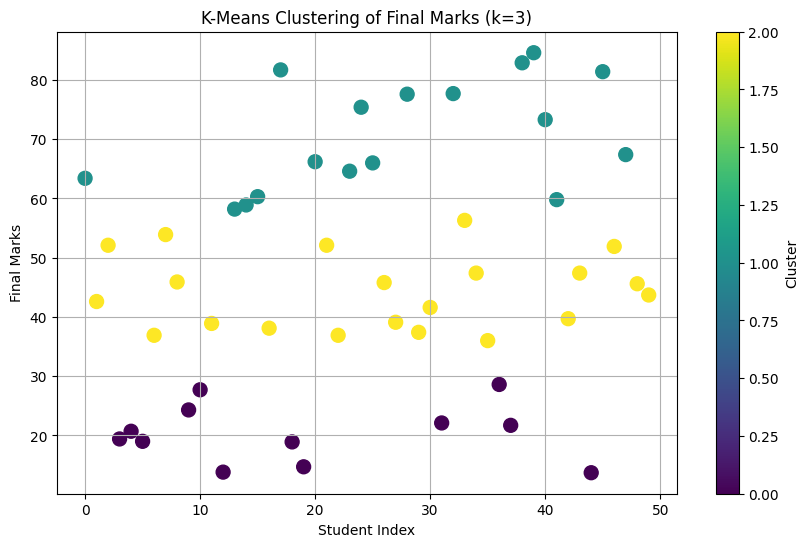

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(final_df)), final_df['final marks'], c=final_df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Student Index')
plt.ylabel('Final Marks')
plt.title('K-Means Clustering of Final Marks (k=3)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
